# Bulk Modulus for Solids

vmin= 3.416419194904387 amin= 4.517938271841838 Bulk Modulus= 5204.9783313481485


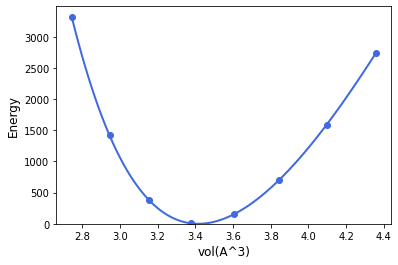

In [1]:
import numpy as np
import pylab as plt
from scipy.interpolate import UnivariateSpline
from scipy.optimize import brentq
import sys

Ry2meV=13.6058*1e3
au2ang = 0.52918
meV_a3_2_GPa = 0.16021766208
    
def findmin(fs, x):
    dfs = fs.derivative()
    if dfs(x[0])*dfs(x[-1])<0 :
        Vmin = brentq( dfs,  x[0],x[-1])
    else:
        Vmin = min(x)
    Emin = fs(Vmin)
    d2E_d2V = fs.derivatives(Vmin)[2]   # 2nd order derrivative
    B = Vmin*d2E_d2V*meV_a3_2_GPa
    return (Vmin, Emin, B)

def Plot(fname):
    a, ene = np.loadtxt(fname).transpose()
    a = (a*au2ang)**3/4.  # volume per atom, As FCC lattice has 4 atoms per unit cell
    ene   = (ene -min(ene ))*Ry2meV

    f = UnivariateSpline(a, ene , s=0.05)
    x = np.linspace(a[0], a[-1], 100)
    derivs = np.zeros((1, 3, len(x) ), dtype=float)  # we want to save only up to 2nd order derivative

    for i in range(len(x)):
        derivs[0,:,i] = f.derivatives(x[i])[:3]  # save only 0th, 1st and 2nd order derrivative

    (Vmin, Emin, B) = findmin(f, x)
    amin = (4*Vmin)**(1./3.) /au2ang
    print ('vmin=', Vmin, 'amin=', amin, 'Bulk Modulus=',B)

    plt.plot(x, f(x)-Emin, ls='-', lw=2., color='royalblue')
    plt.plot(a, ene-Emin, 'o', color='royalblue')

    plt.ylim(bottom=0)
    plt.xlabel('vol(A^3)', fontsize='large')
    plt.ylabel('Energy', fontsize='large')
    plt.show()

if __name__=="__main__":
    fil='energy_data.dat'
    Plot(fil )
